In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import keras 
import seaborn as sns
import pandas as pd

In [2]:
IMG_SIZE = 80
data =[]
input_path = []
label = []

DATADIR = r'C:\DATASET'
CATEGORIES = ['a','aa','e','ee','u','uu','ru','ruu','i','ii','ai','o','oo','au',
              'ka','kha','ga','gha','aana',
              'cha','chaa','ja','jha','ena',
              'tta','ttha','da','dha','ana',
              'tha','thaa','dda','ddha','na',
              'pa','pha','ba','bha','ma',
              'ya','ra','la','va',
              'shey','sha','sa','ha','ala']
for category in CATEGORIES:
    path =os.path.join(DATADIR, category)
    x = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        #img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        data.append([img_arr, x])
        input_path.append(category)
        label.append(x)
        

In [3]:
x =[]
y =[]
for features, labels in data:
    x.append(features)
    y.append(labels)

In [4]:
x = np.array(x)
y = np.array(y)

In [5]:
x=x/255

In [6]:
len(data)

1235

In [7]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,e,2
1,i,8
2,pa,34
3,chaa,20
4,ii,9


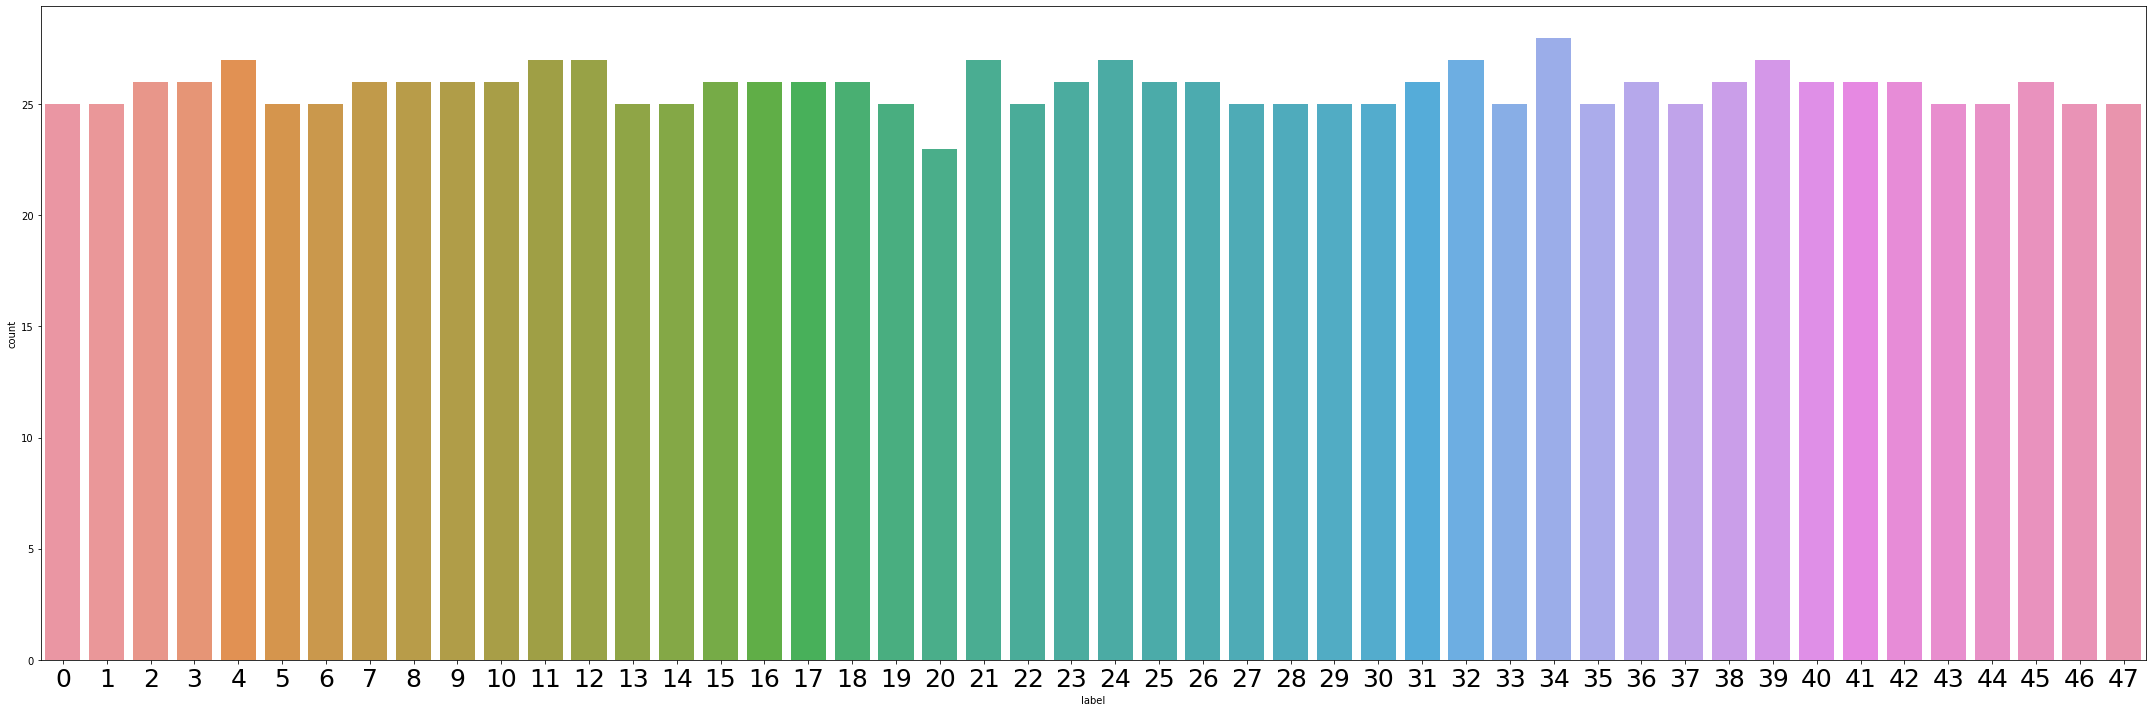

In [8]:
plt.figure(figsize=(30,10)) 
ax=sns.countplot(x="label", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='label'>

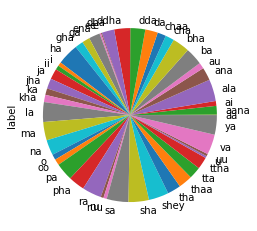

In [9]:
df.groupby('images').sum()['label'].plot.pie()

In [10]:
random.shuffle(data)

In [11]:
import cv2

# Read the original image
img = cv2.imread(img_path) 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)

cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)

cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)

cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)

cv2.waitKey(0)
plt.show()
cv2.destroyAllWindows()

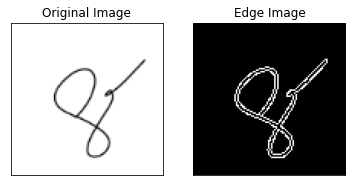

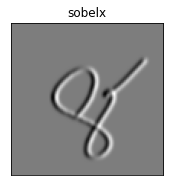

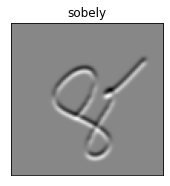

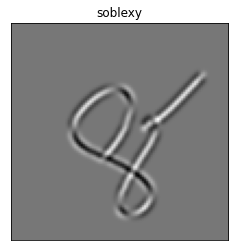

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread(img_path,0)
edges = cv2.Canny(img,100,100)
        
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(sobelx,cmap = 'gray')
plt.title('sobelx'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(122),plt.imshow(sobely,cmap = 'gray')
plt.title('sobely'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(sobelxy,cmap = 'gray')
plt.title('soblexy'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.callbacks import TensorBoard

In [14]:

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:],activation='relu'))

model.add(Dense(51,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x, y, epochs = 10, validation_split=0.1, verbose=1)
scores = model.evaluate(x, y, verbose=0)
print('\nTest Accuracy : %.2f%%' % scores[1])


Epoch 1/10
35/35 [==============================] - 3s 66ms/step - loss: 3.9247 - accuracy: 0.0261 - val_loss: 4.7484 - val_accuracy: 0.0000e+00
Epoch 2/10
35/35 [==============================] - 2s 61ms/step - loss: 3.7716 - accuracy: 0.0351 - val_loss: 6.0463 - val_accuracy: 0.0000e+00
Epoch 3/10
35/35 [==============================] - 3s 76ms/step - loss: 3.3823 - accuracy: 0.1467 - val_loss: 9.3915 - val_accuracy: 0.0000e+00
Epoch 4/10
35/35 [==============================] - 3s 76ms/step - loss: 2.5726 - accuracy: 0.3456 - val_loss: 10.9935 - val_accuracy: 0.0000e+00
Epoch 5/10
35/35 [==============================] - 3s 75ms/step - loss: 1.8921 - accuracy: 0.5041 - val_loss: 15.3274 - val_accuracy: 0.0000e+00
Epoch 6/10
35/35 [==============================] - 2s 68ms/step - loss: 1.3650 - accuracy: 0.6517 - val_loss: 17.7866 - val_accuracy: 0.0000e+00
Epoch 7/10
35/35 [==============================] - 2s 63ms/step - loss: 1.0159 - accuracy: 0.7390 - val_loss: 17.2325 - val_ac

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10368)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [16]:
ds = []
r=cv2.imread(r"C:\TEST.png")
r=cv2.resize(r,(80,80))
ds.append(r)


In [17]:
ds=np.array(ds)
ds.shape

(1, 80, 80, 3)

In [18]:
ds=ds/255

In [19]:
t=model.predict(ds)

In [20]:
t=np.argmax(t)

In [21]:
class_name=CATEGORIES[t]

ఎ AxesImage(54,36;334.8x217.44)


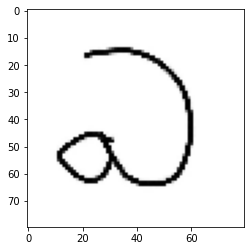

In [22]:
if class_name == 'a':
    print('అ',plt.imshow(r))
elif class_name == 'aa':
    print('ఆ',plt.imshow(r))
elif class_name == 'e':
    print('ఇ',plt.imshow(r))
elif class_name == 'ee':
    print('ఈ',plt.imshow(r))
elif class_name == 'u':
    print('ఉ',plt.imshow(r))
elif class_name == 'uu':
    print('ఊ',plt.imshow(r))
elif class_name == 'ru':
    print('ఋ',plt.imshow(r))
elif class_name == 'ruu':
    print('ౠ',plt.imshow(r))
elif class_name == 'i':
    print('ఎ',plt.imshow(r))
elif class_name == 'ii':
    print('ఏ',plt.imshow(r))
elif class_name == 'ai':
    print('ఐ',plt.imshow(r))
elif class_name == 'o':
    print('ఒ',plt.imshow(r))
elif class_name == 'oo':
    print('ఓ',plt.imshow(r))
elif class_name == 'au':
    print('ఔ',plt.imshow(r))
elif class_name == 'ka':
    print('క',plt.imshow(r))
elif class_name == 'kha':
    print('ఖ',plt.imshow(r))
elif class_name == 'ga':
    print('గ',plt.imshow(r))
elif class_name == 'gha':
    print('ఘ',plt.imshow(r))
elif class_name == 'ana':
    print('ఙ',plt.imshow(r))
elif class_name == 'cha':
    print('చ',plt.imshow(r))
elif class_name == 'chaa':
    print('ఛ',plt.imshow(r))
elif class_name == 'ja':
    print('జ',plt.imshow(r))
elif class_name == 'jha':
    print('ఝ',plt.imshow(r))
elif class_name == 'ena':
    print('ఞ',plt.imshow(r))
elif class_name == 'ta':
    print('ట',plt.imshow(r))
elif class_name == 'ttha':
    print('ఠ',plt.imshow(r))
elif class_name == 'da':
    print('డ',plt.imshow(r))
elif class_name == 'dha':
    print('ఢ',plt.imshow(r))
elif class_name == 'aana':
    print('ణ',plt.imshow(r))
elif class_name == 'tha':
    print('త',plt.imshow(r))
elif class_name == 'thaa':
    print('థ',plt.imshow(r))
elif class_name == 'dda':
    print('ద',plt.imshow(r))
elif class_name == 'ddha':
    print('ధ',plt.imshow(r))
elif class_name == 'na':
    print('న',plt.imshow(r))
elif class_name == 'pa':
    print('ప',plt.imshow(r))
elif class_name == 'pha':
    print('ఫ',plt.imshow(r))
elif class_name == 'ba':
    print('బ',plt.imshow(r))
elif class_name == 'bha':
    print('భ',plt.imshow(r))
elif class_name == 'ma':
    print('మ',plt.imshow(r))
elif class_name == 'ya':
    print('య',plt.imshow(r))
elif class_name == 'ra':
    print('ర',plt.imshow(r))
elif class_name == 'la':
    print('ల',plt.imshow(r))
elif class_name == 'va':
    print('వ',plt.imshow(r))
elif class_name == 'shey':
    print('శ',plt.imshow(r))
elif class_name == 'sha':
    print('ష',plt.imshow(r))
elif class_name == 'sa':
    print('స',plt.imshow(r))
elif class_name == 'ha':
    print('హ',plt.imshow(r))
elif class_name == 'ala':
    print('ళ',plt.imshow(r))
else:
    print(1)